In [1]:
import os
os.environ["ATLASAPPROX_HIDECREDITS"] = "yes"
import atlasapprox

api = atlasapprox.API()

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
avg_gene_expr_lung = api.average(
    organism='h_sapiens', 
    organ='lung', 
    features=['PRDM1', 'PTPRC', 'ACTB', 'GAPDH'],
    measurement_type='gene_expression'
)

# Set displayed pandas dataframe size
pd.set_option('display.max_rows', 10)       # Limit to 10 rows
pd.set_option('display.max_columns', 7)     # Limit to 7 columns

# display results
avg_gene_expr_lung


,neutrophil,basophil,monocyte,...,pericyte,mesothelial,ionocyte
PRDM1,0.176963,0.023585,0.513526,...,0.622059,0.012507,0.000000
PTPRC,22.312710,2.443684,7.794549,...,0.638058,0.586943,0.541398
ACTB,118.968338,28.412338,73.133392,...,56.245354,23.728510,25.516708
GAPDH,5.091514,8.243008,15.813489,...,7.462914,9.748388,19.264896


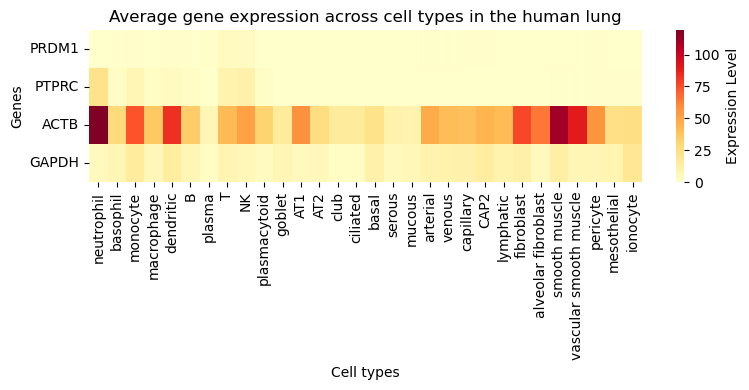

In [4]:
# Create a figure with a specific size (width=8, height=4)
plt.figure(figsize=(8,4))

sns.heatmap(
        avg_gene_expr_lung, 
        # yellow-to-red color map
        cmap='YlOrRd', 
        # add label to calour bar
        cbar_kws={'label': 'Expression Level'}
)

# Customize labels
plt.title('Average gene expression across cell types in the human lung')
plt.xlabel('Cell types')
plt.ylabel('Genes')

# Keep gene names horizontal
plt.yticks(rotation=0)

# Prevent label cutoff
plt.tight_layout()

plt.show()

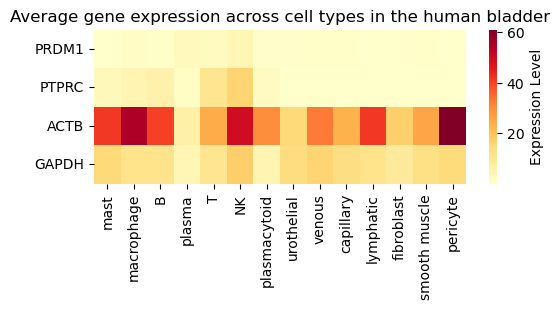

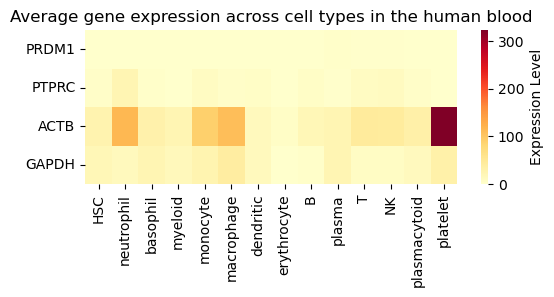

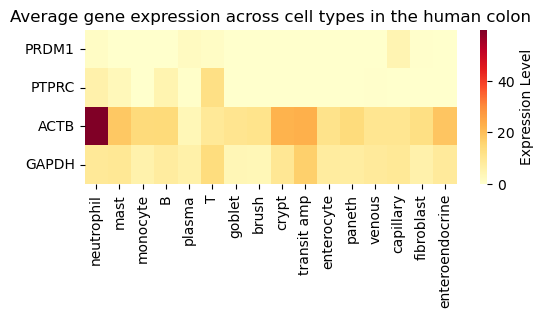

In [5]:
# Define the target organs.
organ_list = ['bladder','blood','colon']

# create a dictionary to store each avg_gene_expr
avg_gene_expr_dic = {}

# Loop through organ_list and display the results
for organ in organ_list: 
    avg_gene_expr = api.average(
        organism='h_sapiens', 
        organ=organ, 
        features=['PRDM1', 'PTPRC', 'ACTB', 'GAPDH'],
    )

    # Store results into dictionary
    avg_gene_expr_dic[organ] = avg_gene_expr

    # Set up figure and display heatmap
    plt.figure(figsize=(6,2))
    plt.title(f'Average gene expression across cell types in the human {organ}')

    sns.heatmap(
        avg_gene_expr, 
        # yellow-to-red color map
        cmap='YlOrRd', 
        # add label to calour bar
        cbar_kws={'label': 'Expression Level'}
    )

    # Show the plot
    plt.show()

In [6]:
similar_features = api.similar_features(
    organism='h_sapiens', 
    organ='lung', 
    feature='TP53',
    method='correlation',
    number=10
)

similar_features

METTL14     0.134515
HDAC8       0.134577
MTOR        0.139444
HNRNPL      0.141596
LANCL2      0.142775
SEH1L       0.143445
MED4        0.145775
AHR         0.148074
HSPA14-1    0.149418
TRA2A       0.149765
dtype: float64

<Axes: >

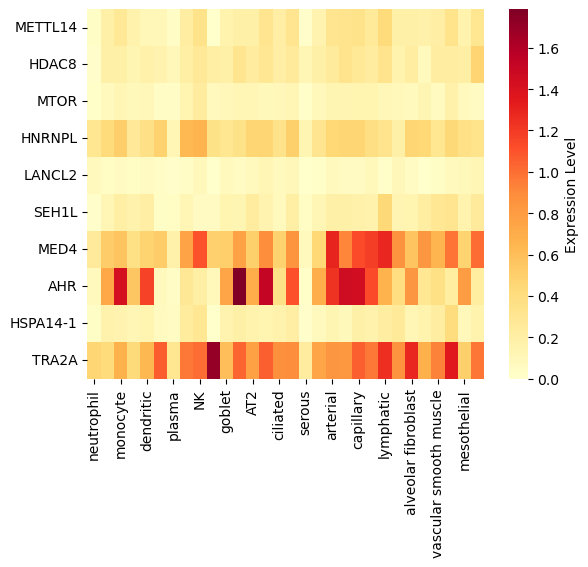

In [7]:
# Get average gene expression 
avg_similar_features = api.average(
    organism='h_sapiens',
    organ='lung',
    features=similar_features.index
)

# Display the heatmap
sns.heatmap(
    avg_similar_features, 
    # yellow-to-red color map
    cmap='YlOrRd', 
    # add label to calour bar
    cbar_kws={'label': 'Expression Level'}
)

In [8]:
markers_in_human_lung_neu = api.markers(
    organism='h_sapiens', 
    organ='lung', 
    cell_type='neutrophil', 
    number=5
)

markers_in_human_lung_neu

['CXCR2', 'FCGR3B', 'IL1R2', 'G0S2', 'MTND5P32']

<Axes: >

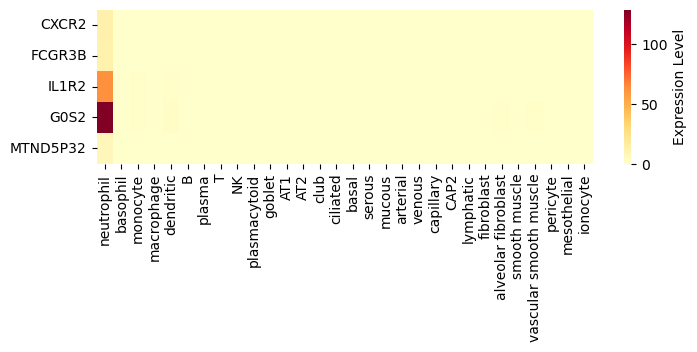

In [9]:
# Getting average gene expression for marker genes
avg_gene_expr_markers = api.average(
    organism='h_sapiens',
    organ='lung',
    features=markers_in_human_lung_neu
)

plt.figure(figsize=(8,2))

sns.heatmap(
    avg_gene_expr_markers, 
    # yellow-to-red color map
    cmap='YlOrRd', 
    # add label to calour bar
    cbar_kws={'label': 'Expression Level'}
)

<Axes: >

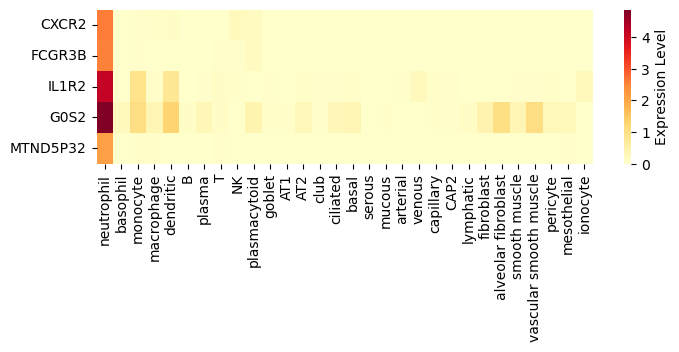

In [10]:
# Call log method in numpy to get all numbers logged
# add 1 to avoid "devide by 0"
avg_gene_expr_markers_log = np.log(avg_gene_expr_markers + 1)

# Display heatmap
plt.figure(figsize=(8,2))

sns.heatmap(
    avg_gene_expr_markers_log, 
    # yellow-to-red color map
    cmap='YlOrRd', 
    # add label to calour bar
    cbar_kws={'label': 'Expression Level'}
)